Random search works a little differently. Instead of giving a list of hyperparameter values for the optimization algorithm to test, you'll provide statistical distributions of hyperparameter values that you'd like the optimization algorithm to test values from.

The random search algorithm randomly samples hyperparameter values from the defined distributions and then tests them by generating a model. Like grid search, random search uses a pre-defined metric to determine the best set of hyperparameter values.

Random search has been found to be more efficient for hyperparameter optimization - both in theory and in practice. Random search effectively searches a larger configuration space than grid search. 

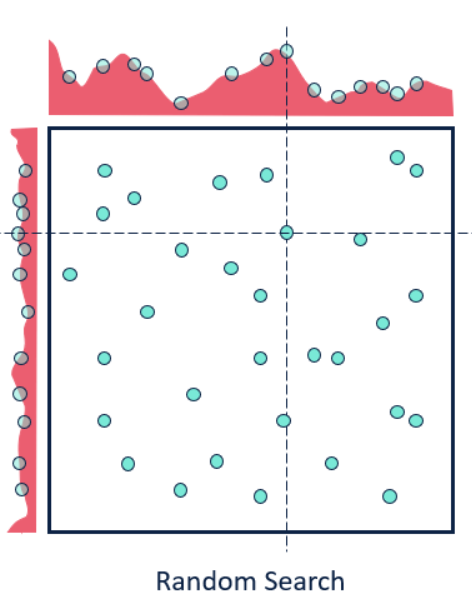

So, for our decision tree example we might provide a normal distribution for the minimum number of records with a mean of 20 and a standard deviation of 5, and a uniform distribution ranging from 1 to 6 for the maximum node depth.

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy.stats import uniform, norm
from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a basic DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

param_dist = {
    'max_depth': np.arange(1, 20),  # Ensure max_depth values are integers
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20)
}

# Create the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Make predictions with the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Classification report:")
print(classification_report(y_test, y_pred))

print("Best parameters found:")
print(random_search.best_params_)

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Best parameters found:
{'min_samples_split': 14, 'min_samples_leaf': 3, 'max_depth': 18}


Part of the reason random search typically outperforms grid search is that typically, only a few hyperparameters really matter for a given dataset, and finding the optimal values for these dominant hyperparameters will have more impact than getting an optimal combination of all hyperparameters.

 The hyperparameters that are important are different across datasets, so there is not a way of knowing which hyperparameters matter most for your specific dataset (i.e., there is no free lunch).

Random search is more likely than grid search to find the optimal value for the important hyperparameter values because it searches a larger area for hyperparameter values (given the same computational budget).